# Advanced task: Analysis of access to electricity

**Author:** Alonso Andrade Blázquez

### Task statement

The World Bank offers a large amount of open data. In this exercise we will focus on the % of population having access to electricity in all the countries of the world since 1960 to 2014.  The data can be obtained from this link: https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS. After selecting the CSV format you will get a zip file containing, among others, these two files:
- *API_EG.ELC.ACCS.ZS_DS2_en_csv_v2.csv*
- *Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2.csv*

After taking a look to the content of these files, write a program named electricityAnalysis.py that, given two years (e.g., 1970 and 1980), prints in the screen the percentage of countries of each of the regions (South Asia, North America, etc.) having at least a 99% of electricity during all the years between to which have been indicated. The output must be ordered in descendent order by the percentage value, and it should look like this example (the data are invented): 

| **Region** | **Percentage** |
| -------- :| --------:|
| North America   | 100%   |
| Europe & Central Asia   | 99%   |
| ...   | ...  |

You have to take into accout that the two files have headers and some lines have missing fields. As a hint, to combine the data of the two files just consider the use of the join() transformation.

The deliverables of this exercise will be the program files and the screen capture of its output.

### Task resolution

In [1]:
# import findspark
from pyspark.sql import SparkSession

**Data exploration**

*API_EG.ELC.ACCS.ZS_DS2_en_csv_v2.csv* file contains several lineas above the header. It is necessary to drop those lines before loading the file to Spark:
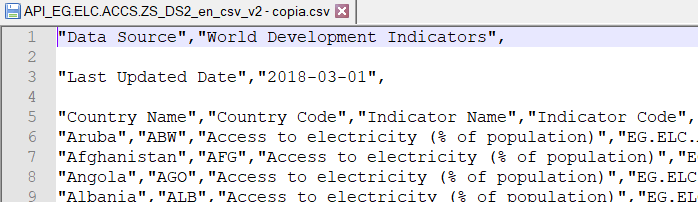

In [3]:
# Set Spark session
spark_session = SparkSession \
    .builder \
    .getOrCreate()

In [4]:
logger = spark_session._jvm.org.apache.log4j
logger.LogManager.getLogger("org").setLevel(logger.Level.WARN)

In [5]:
# Load electricity access information
world_electricity_access = spark_session \
    .read \
    .format("csv") \
    .option("header", "true")\
    .option("delimiter", ",") \
    .option("inferSchema", "true") \
    .load("data/API_EG.ELC.ACCS.ZS_DS2_en_csv_v2.csv")

In [6]:
# Obtain years columns
year_columns = world_electricity_access.columns[4:-1]
print(year_columns)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [7]:
# Cast year columns to number
for year_column in year_columns:
    world_electricity_access = world_electricity_access \
        .withColumn(year_column, world_electricity_access[year_column].cast('double'))

In [8]:
world_electricity_access.printSchema()

root
 |-- Country Name: string (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- Indicator Name: string (nullable = true)
 |-- Indicator Code: string (nullable = true)
 |-- 1960: double (nullable = true)
 |-- 1961: double (nullable = true)
 |-- 1962: double (nullable = true)
 |-- 1963: double (nullable = true)
 |-- 1964: double (nullable = true)
 |-- 1965: double (nullable = true)
 |-- 1966: double (nullable = true)
 |-- 1967: double (nullable = true)
 |-- 1968: double (nullable = true)
 |-- 1969: double (nullable = true)
 |-- 1970: double (nullable = true)
 |-- 1971: double (nullable = true)
 |-- 1972: double (nullable = true)
 |-- 1973: double (nullable = true)
 |-- 1974: double (nullable = true)
 |-- 1975: double (nullable = true)
 |-- 1976: double (nullable = true)
 |-- 1977: double (nullable = true)
 |-- 1978: double (nullable = true)
 |-- 1979: double (nullable = true)
 |-- 1980: double (nullable = true)
 |-- 1981: double (nullable = true)
 |-- 1982: double (null

In [9]:
world_electricity_access.count()

264

In [10]:
# Load countries data
country_metadata = spark_session \
    .read \
    .format("csv") \
    .option("header", "true")\
    .option("delimiter", ",") \
    .option("inferSchema", "true") \
    .load("data/Metadata_Country_API_EG.ELC.ACCS.ZS_DS2_en_csv_v2.csv")

In [13]:
country_metadata.printSchema()
country_metadata.count()

root
 |-- Country Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- IncomeGroup: string (nullable = true)
 |-- SpecialNotes: string (nullable = true)
 |-- TableName: string (nullable = true)
 |-- _c5: string (nullable = true)



264

In [29]:
# Join both tables
world_electricity_access_with_metadata = world_electricity_access.join(country_metadata, "Country Code")
display(world_electricity_access_with_metadata.toPandas())

,Country Code,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,_c62,Region,IncomeGroup,SpecialNotes,TableName,_c5
0,ABW,Aruba,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,94.468323,None,None,None,None,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,None
1,AFG,Afghanistan,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,89.500000,None,None,None,None,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,None
2,AGO,Angola,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,32.000000,None,None,None,None,Sub-Saharan Africa,Lower middle income,None,Angola,None
3,ALB,Albania,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,100.000000,None,None,None,None,Europe & Central Asia,Upper middle income,None,Albania,None
4,AND,Andorra,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,100.000000,None,None,None,None,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,None
5,ARB,Arab World,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,88.039125,None,None,None,None,None,None,Arab World aggregate. Arab World is composed o...,Arab World,None
6,ARE,United Arab Emirates,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,100.000000,None,None,None,None,Middle East & North Africa,High income,None,United Arab Emirates,None
7,ARG,Argentina,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,100.000000,None,None,None,None,Latin America & Caribbean,Upper middle income,National Institute of Statistics and Census re...,None,None
8,ARM,Armenia,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,100.000000,None,None,None,None,Europe & Central Asia,Lower middle income,None,Armenia,None
9,ASM,American Samoa,Access to electricity (% of population),EG.ELC.ACCS.ZS,None,None,None,None,None,None,...,NaN,None,None,None,None,East Asia & Pacific,Upper middle income,New base Year 2009,American Samoa,None


In [15]:
world_electricity_access_with_metadata.createOrReplaceTempView("world_electricity_access")

In [18]:
# Start, end date and access rate
START_DATE = 2000
END_DATE = 2005
MINIMUM_ELECTRICITY_RATE = 99

# Build query string to use SQL later
years_string = ""
years_range = range(START_DATE, END_DATE + 1)

i=0
for year in years_range:
    years_string = years_string + "`" + (str(year)) + "`"
    years_string = years_string + " >= "
    years_string = years_string + str(MINIMUM_ELECTRICITY_RATE)
    if i < (len(years_range) - 1):
        years_string = years_string + (" AND ")
    i=i+1
        
print(years_string)

`2000` >= 99 AND `2001` >= 99 AND `2002` >= 99 AND `2003` >= 99 AND `2004` >= 99 AND `2005` >= 99


In [36]:
# Create temporary table
world_electricity_access_with_metadata.createOrReplaceTempView("world_electricity_access")

sql_countries_per_region = spark_session.sql("SELECT `Region`, COUNT (`Country Name`) AS `Countries per region` \
                          FROM world_electricity_access \
                          WHERE `Region`!= '' \
                          GROUP BY `Region`")

sql_countries_equal_higher_99 = spark_session.sql("SELECT `Region`, \
                                                  COUNT (`Country Name`) AS `Countries equal or higher 99 % access`\
                                                  FROM world_electricity_access \
                                                  WHERE " + years_string + " AND `Region`!= '' GROUP BY `Region`")

sql_countries_per_region.show(truncate=False)
sql_countries_equal_higher_99.show(truncate=False)

+--------------------------+--------------------+
|Region                    |Countries per region|
+--------------------------+--------------------+
|South Asia                |8                   |
|Sub-Saharan Africa        |48                  |
|Europe & Central Asia     |58                  |
|North America             |3                   |
|East Asia & Pacific       |37                  |
|Middle East & North Africa|21                  |
|Latin America & Caribbean |42                  |
+--------------------------+--------------------+

+--------------------------+-------------------------------------+
|Region                    |Countries equal or higher 99 % access|
+--------------------------+-------------------------------------+
|Sub-Saharan Africa        |1                                    |
|Europe & Central Asia     |47                                   |
|North America             |3                                    |
|East Asia & Pacific       |13                 

As we see above, we obtained in two separate queries the information of the count of countries per region and the same but fulfilling the constraint of having >=99% rate of access to electricity. To combine both queries an option is to create views and using those views in the final query:

In [38]:
sqlView1 = spark_session.sql("CREATE OR REPLACE TEMPORARY VIEW `Countries per region` \
                                AS SELECT `Region`, COUNT (`Country Name`) AS `Countries count` \
                                FROM world_electricity_access \
                                WHERE `Region`!= '' \
                                GROUP BY `Region`")

sqlView2 = spark_session.sql("CREATE OR REPLACE TEMPORARY VIEW `Countries with access >= 99%` \
                              AS SELECT `Region`, COUNT (`Country Name`) AS `Countries >=99% access`\
                              FROM world_electricity_access \
                              WHERE " + years_string + " AND `Region`!= '' GROUP BY `Region`")

sql_access_equal_higher_99= spark_session \
                            .sql("SELECT A.`Region`, \
                                (B.`Countries >=99% access` / A.`Countries count` * 100) AS `% Countries >=99% access` \
                                FROM `Countries per region` A, `Countries with access >= 99%` B \
                                WHERE A.`Region`= B.`Region` \
                                ORDER BY `% Countries >=99% access` DESC")

print("Rate of countries per region having access percentage to electricity equal or higher than " 
      + str(MINIMUM_ELECTRICITY_RATE) + " between the years " + str(START_DATE) + "-" + str(END_DATE))

sql_access_equal_higher_99.show(truncate=False)

Rate of countries per region having access percentage to electricity equal or higher than 99 between the years 2000-2005
+--------------------------+------------------------+
|Region                    |% Countries >=99% access|
+--------------------------+------------------------+
|North America             |100.0                   |
|Europe & Central Asia     |81.03448275862068       |
|East Asia & Pacific       |35.13513513513514       |
|Middle East & North Africa|33.33333333333333       |
|Latin America & Caribbean |16.666666666666664      |
|Sub-Saharan Africa        |2.083333333333333       |
+--------------------------+------------------------+



We can beautify the output by using pandas:

In [25]:
display(sql_access_equal_higher_99.toPandas())

,Region,% Countries >=99% access
0,North America,100.000000
1,Europe & Central Asia,81.034483
2,East Asia & Pacific,35.135135
3,Middle East & North Africa,33.333333
4,Latin America & Caribbean,16.666667
5,Sub-Saharan Africa,2.083333
